In [ ]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/vgames2.csv') # 판매량 단위 1,000,000(백만)
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [ ]:
df.dtypes #데이터타입 확인

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [ ]:
df['JP_Sales'] = df['JP_Sales'].replace({"K":"/1e3", "M":"/1e6"}, regex=True).map(pd.eval).astype(float)
df["NA_Sales"] = df["NA_Sales"].replace({"K":"/1e3", "M":"/1e6"}, regex=True).map(pd.eval).astype(float)
df["EU_Sales"] = df["EU_Sales"].replace({"K":"/1e3", "M":"/1e6"}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({"K":"/1e3", "M":"/1e6"}, regex=True).map(pd.eval).astype(float)

#데이터프레임의 각 열에 있는 M과 K를 다른 숫자들과 단위를 맞춰주는 작업


In [ ]:
# df = df.astype({'NA_Sales':'str'})
# df = df.astype({'EU_Sales':'str'})
# df = df.astype({'JP_Sales':'str'})
# df = df.astype({'Other_Sales':'str'})

In [ ]:
df.head(15)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.000000e+00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.000000e+00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.000000e+00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.000000e+00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,9.000000e-02,0.00,0.04
5,6,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.000000e+00,0.14,0.00
6,7,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,1.000000e-02,0.00,0.00
7,8,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.000000e+00,0.11,0.01
8,9,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.000000e+00,0.04,0.00
9,10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,3.000000e-02,0.00,0.01


In [ ]:
df.dropna(axis=0) #결측치 제거

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 각 국의 구매력
df['NA_Sales'].sum()

4349.260043689999

In [ ]:
df['EU_Sales'].sum()

2414.81001932

In [ ]:
df['JP_Sales'].sum()

1278.68001234

In [ ]:
df['Other_Sales'].sum()

794.09000366

In [ ]:
# 게임계의 전체 매출
4349.260043689999 + 2414.81001932 + 1278.68001234 + 794.09000366

8836.840079009999

각 국의 구매력을 보았을 때 NA지역의 구매력이 가장 높고
EU, JP, OT의 순서임을 확인 할 수 있다.

따라서 우리는 NA 지역의 소비자들의 니즈를 공략하는 것이 중요하다고 분석된다.
이어지는 분석에서는 어떤 장르가 가장 많은 판매량을 확보했는지 분석해 보고자 한다.

In [ ]:
# X축은 장르를 놓고 Y축에는 판매량을 놓았다. 우리는 이 분석을 통해서
# 각 지역에서 어떤 장르가 판매가 많이 됐는지 분석할 것이다.
columns = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
genre1 = df[columns]
print(type(genre1))
genre1.head(20)

<class 'pandas.core.frame.DataFrame'>


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.000000e+00,0.00,0.00
1,Action,0.17,0.000000e+00,0.00,0.01
2,Adventure,0.00,0.000000e+00,0.02,0.00
3,Misc,0.04,0.000000e+00,0.00,0.00
4,Platform,0.12,9.000000e-02,0.00,0.04
5,Sports,0.00,0.000000e+00,0.14,0.00
6,Simulation,0.02,1.000000e-02,0.00,0.00
7,Action,0.07,0.000000e+00,0.11,0.01
8,Adventure,0.00,0.000000e+00,0.04,0.00
9,Action,0.04,3.000000e-02,0.00,0.01


In [ ]:
# 장르 별 게임 갯수
df['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [ ]:
# df_new = pd.DataFrame(df.groupby(by=['Genre']).sum().cumsum()).drop(['Unnamed: 0', 'Year'], axis=1)

data = df.groupby(by=['Genre']).sum()
df_new = pd.DataFrame(data)
df_new = df_new.drop(['Unnamed: 0', 'Year'], axis=1)

df_new

#우리는 이 결과를 통해서 지역에 따라 선호하는 게임의 장르가 다르다는 것을 확인할 수 있습니다. 

# 그래프를 넣자.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,860.190015,519.330003,157.630000,186.020000
Adventure,105.170000,64.000000,51.930000,16.610000
Fighting,222.650001,101.190000,86.180001,36.280000
Misc,407.510001,211.680001,105.080000,73.710000
Platform,444.530002,195.280006,130.070001,51.390000
Puzzle,123.340000,50.370000,56.870000,12.470000
Racing,350.730006,235.690001,56.380000,77.020000
Role-Playing,319.150000,182.000002,337.000008,56.070001
Shooter,572.140010,310.160003,38.260000,102.250000


In [ ]:
df_new2 = pd.DataFrame(data)
df_new2 = df_new2.drop(['Unnamed: 0', 'Year', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
df_new2

,NA_Sales
Genre,
Action,860.190015
Adventure,105.170000
Fighting,222.650001
Misc,407.510001
Platform,444.530002
Puzzle,123.340000
Racing,350.730006
Role-Playing,319.150000
Shooter,572.140010


In [ ]:
label = ['Action', 'Adventure', 'Fighting', 'Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

index = np.arange(len(label))

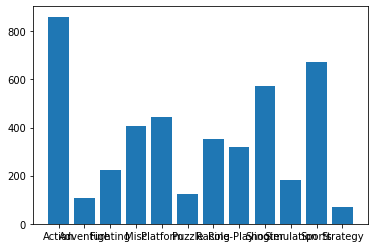

In [ ]:
Genre = ['Action', 'Adventure', 'Fighting', 'Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
values = [860.190015, 105.170000, 222.650001, 407.510001, 444.530002, 123.340000, 350.730006, 319.150000, 572.140010, 182.590000, 672.180008, 68.470000]

plt.bar(index, values)
plt.xticks(index, Genre)

plt.show()

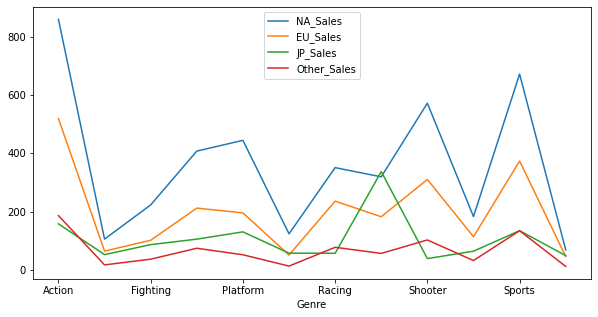

In [ ]:
from matplotlib import pyplot
df_new.plot(figsize=(10, 5))
pyplot.show()

In [ ]:
# 80년대 / 90년대 / 2000년대로 나누어 분석
df1 = df.copy()

for i in range(len(df1['Year'] )):
  if df1['Year'][i] < 50 :
    df1['Year'][i] += 2000
  elif df1['Year'][i] < 100:
    df1['Year'][i] += 1900 



data1 = pd.DataFrame(df1.groupby(by=['Year']).sum())
data1 = data1.drop(['Unnamed: 0'], axis=1)
data1.head(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1980.0,10.590000,0.670000,0.000000,0.12
1981.0,33.400000,1.960000,0.000000,0.32
1982.0,26.920000,1.650000,0.000000,0.31
1983.0,7.760000,0.800000,8.100000,0.14
1984.0,33.280000,2.100000,14.270000,0.70
1985.0,33.270000,4.740000,14.560000,0.92
1986.0,12.500000,2.840000,19.810000,1.93
1987.0,8.460000,1.410000,11.630000,0.20
1988.0,23.870000,6.590000,15.760000,0.99


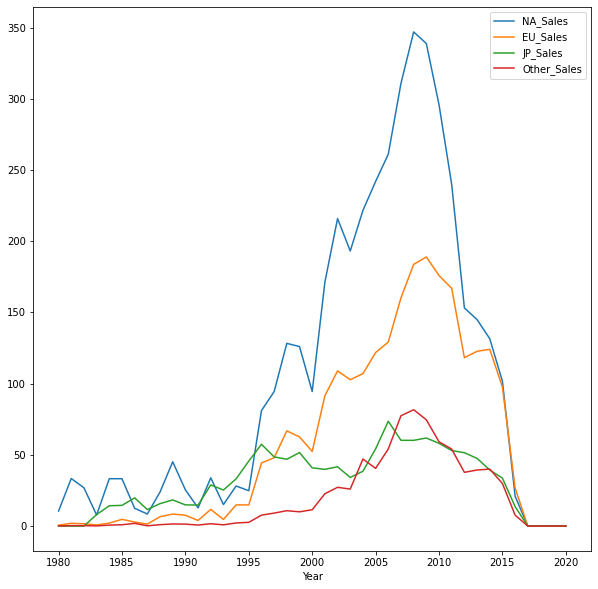

In [ ]:
data1.plot(figsize=(10, 10))
pyplot.show()

# 각연도별 구매력

In [ ]:

data = df.groupby(by=['Genre']).sum()
df_new = pd.DataFrame(data)
df_new = df_new.drop(['Unnamed: 0', 'Year'], axis=1)

df_new

In [ ]:
df.loc[df.groupby(['Genre'])['NA_Sales'].idxmax()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14669,14670,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57
6847,6848,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29
14902,14903,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02
4343,4344,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67
4199,4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
1203,1204,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12579,12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
7829,7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
10488,10489,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47
11137,11138,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75


In [ ]:
df.loc[df.groupby(['Genre'])['EU_Sales'].idxmax()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3483,3484,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
9554,9555,Myst,PC,1994.0,Adventure,Red Orb,0.02,2.79,0.00,0.00
14902,14903,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02
13229,13230,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05
6937,6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
511,512,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18
12579,12580,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31
7829,7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
4240,4241,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52
11137,11138,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75


In [ ]:
df.loc[df.groupby(['Genre'])['JP_Sales'].idxmax()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4806,4807,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77
6847,6848,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29
12568,12569,Street Fighter II: The World Warrior,SNES,1992.0,Fighting,Capcom,2.47,0.83,2.87,0.12
13229,13230,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05
4199,4200,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77
511,512,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18
10650,10651,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92
7829,7830,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00
5692,5693,Splatoon,WiiU,2015.0,Shooter,Nintendo,1.55,1.15,1.44,0.43
3273,3274,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88


In [ ]:
df.loc[df.groupby(['Genre'])['Other_Sales'].idxmax()]

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14669,14670,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57
8031,8032,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,1.91,2.00,0.09,0.83
4853,4854,WWE SmackDown vs Raw 2008,PS2,2007.0,Fighting,THQ,0.92,0.00,0.01,1.41
3014,3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85
6937,6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90
511,512,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18
14665,14666,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53
11610,11611,Dragon Warrior,NES,1986.0,Role-Playing,Capcom,0.49,0.00,0.52,1.51
4240,4241,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52
11137,11138,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75


In [ ]:
gta = df[df['Name'].str.contains('Grand Theft Auto')]
gta

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
761,762,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.900000e+00,2.83,0.24,1.75
797,798,Grand Theft Auto: Vice City Stories,PS2,2007.0,Action,Take-Two Interactive,7.800000e-01,0.03,0.03,0.13
955,956,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,Adventure,Take-Two Interactive,6.000000e-08,0.04,0.00,0.01
2008,2009,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.800000e+00,5.81,0.36,2.02
2079,2080,Grand Theft Auto: Vice City,PC,2003.0,Action,Take-Two Interactive,0.000000e+00,0.03,0.00,0.01
3447,3448,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003.0,Action,Take-Two Interactive,8.500000e-01,0.66,0.00,0.22
3483,3484,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.010000e+00,9.27,0.97,4.14
3632,3633,Grand Theft Auto: San Andreas,X360,2008.0,Action,Take-Two Interactive,8.000000e-02,0.03,0.00,0.01
4148,4149,Grand Theft Auto IV,PC,2008.0,NaN,Take-Two Interactive,1.000000e-02,0.79,0.00,0.08
5267,5268,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,Action,Take-Two Interactive,1.840000e+00,0.56,0.00,0.09
